In [3]:
import datetime as dtm

In [4]:
import pandas as pd

This function converts a string date to a date object

In [5]:
def to_date(date_str):
    m,d,y = date_str.split('/')
    dt_obj = dtm.date(int(y),int(m),int(d))
    return dt_obj
    

Here we are loading the CSV

In [8]:
df = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')

In [9]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1/4/2017,788.36,991.34,783.16,786.90,"1,073,000"
1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
1/12/2017,510.14,807.39,510.14,806.36,"1,353,100"
1/13/2017,807.48,991.34,806.69,807.88,"1,099,200"


In [21]:
df.index

Index(['1/3/2017', '1/4/2017', '1/5/2017', '1/6/2017', '1/9/2017', '1/10/2017',
       '1/11/2017', '1/12/2017', '1/13/2017', '1/17/2017', '1/18/2017',
       '1/19/2017', '1/20/2017', '1/23/2017', '1/24/2017', '1/25/2017',
       '1/26/2017', '1/27/2017', '1/30/2017', '1/31/2017'],
      dtype='object', name='Date')

In [10]:
lowest = min(df['Low'])

In [11]:
lowest

510.14

In [12]:
highest = max(df['High'])

In [13]:
highest

991.34

In [14]:
filt = (df['Low'] == lowest)

In [16]:
lows = df[filt]
lows

,Open,High,Low,Close,Volume
Date,,,,,
1/12/2017,510.14,807.39,510.14,806.36,"1,353,100"
1/17/2017,510.14,807.14,510.14,804.61,"1,362,100"


In [17]:
low_dates = lows.index

In [18]:
low_dates

Index(['1/12/2017', '1/17/2017'], dtype='object', name='Date')

In [19]:
last_low = low_dates[-1]
last_low

'1/17/2017'

In [20]:
dt_last_low  = to_date(last_low)
dt_last_low

datetime.date(2017, 1, 17)

In [22]:
df_temp = df.index.map(to_date)
df_temp

Index([2017-01-03, 2017-01-04, 2017-01-05, 2017-01-06, 2017-01-09, 2017-01-10,
       2017-01-11, 2017-01-12, 2017-01-13, 2017-01-17, 2017-01-18, 2017-01-19,
       2017-01-20, 2017-01-23, 2017-01-24, 2017-01-25, 2017-01-26, 2017-01-27,
       2017-01-30, 2017-01-31],
      dtype='object', name='Date')

In [23]:
filt2 = df.index.map(to_date) > dt_last_low

In [24]:
df_last_lows = df[filt2]

In [25]:
df_last_lows

,Open,High,Low,Close,Volume
Date,,,,,
1/18/2017,805.81,806.21,800.99,806.07,"1,294,400"
1/19/2017,805.12,809.48,801.80,802.17,"919,300"
1/20/2017,806.91,806.91,801.69,805.02,"1,670,000"
1/23/2017,807.25,991.34,803.74,819.31,"1,963,600"
1/24/2017,822.30,825.90,817.82,823.87,"1,474,000"
1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
1/30/2017,814.66,991.34,799.80,802.32,"3,246,600"


In [26]:
lst_last_lows = list(df_last_lows.index)

In [27]:
lst_last_lows

['1/18/2017',
 '1/19/2017',
 '1/20/2017',
 '1/23/2017',
 '1/24/2017',
 '1/25/2017',
 '1/26/2017',
 '1/27/2017',
 '1/30/2017',
 '1/31/2017']

In [28]:
lst_highs = []

In [29]:
for last_low_row in lst_last_lows:
    print(last_low_row)
    lst_highs.append(df.loc[last_low_row]['High'])

1/18/2017
1/19/2017
1/20/2017
1/23/2017
1/24/2017
1/25/2017
1/26/2017
1/27/2017
1/30/2017
1/31/2017


In [30]:
lst_highs

[806.21, 809.48, 806.91, 991.34, 825.9, 835.77, 838.0, 841.95, 991.34, 801.25]

In [31]:
highest_lst_highs = max(lst_highs)
highest_lst_highs

991.34

In [33]:
highest_lst_highs_dt = 0
for last_low_row2 in lst_last_lows:
    if df_last_lows.loc[last_low_row2]['High'] == highest_lst_highs:
        highest_lst_highs_dt = to_date(last_low_row2)
        break
        
highest_lst_highs_dt

datetime.date(2017, 1, 23)

In [34]:
increase = highest_lst_highs - lowest
increase

481.20000000000005

In [35]:
diff_dates = highest_lst_highs_dt - dt_last_low
diff_dates

datetime.timedelta(days=6)

In [37]:
str_diff_dts = str(diff_dates)

In [38]:
spl_st_diff_dts = str_diff_dts.split(',')

In [39]:
print(f'There was an increase of rupees {increase} in the timespan of {spl_st_diff_dts[0]}')

There was an increase of rupees 481.20000000000005 in the timespan of 6 days


In [40]:
from matplotlib import pyplot as plt

In [41]:
vals_x = ['Lowest','Highest(after lowest)']
vals_y = [lowest,highest_lst_highs]


<BarContainer object of 2 artists>

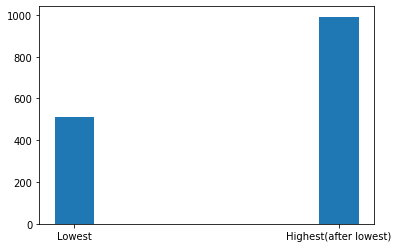

In [42]:
plt.bar(vals_x,vals_y,label='Trends',width=0.15)